## Import

In [1]:
from src.agent import DQNAgent, Config
from src.qlearning.qagent import QAgent
import gym
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Environnement  
  
Both AI will be trained on the same environnement and same numbers of episode to make it easier to compare overall perfomance

In [2]:
env_name = "Taxi-v3"
env = gym.make(env_name)
print('Observation:', env.observation_space.n, env.desc.shape[1], env.desc.shape[0])
print('Action:', env.action_space.n)

Observation: 500 11 7
Action: 6


## Configuration

In [3]:
config_dqn = Config(target_update=5, 
                lr=0.01,
                lr_min=0.001,
                lr_decay=50, 
                gamma=0.99,
                loss='mse', 
                memory_size=50000, 
                batch_size=128, 
                eps_start=1, 
                eps_min=0.01, 
                eps_decay=300,
                learning_start=200,
                double_dqn=False)

## Train Q Learning agent

In [4]:
qagent = QAgent(env)
qagent_scores = qagent.fit(epochs=5000)

## Train Deep Q Learning agent

In [5]:
dqn_agent = DQNAgent(env=env, config=config_dqn)
_, dqn_scores = dqn_agent.fit(wandb_log=False, save=False, epochs=1500)

## Plotting training results

In [6]:
df_dqn = pd.Series(dqn_scores[200:])
df_qn = pd.Series(qagent_scores)

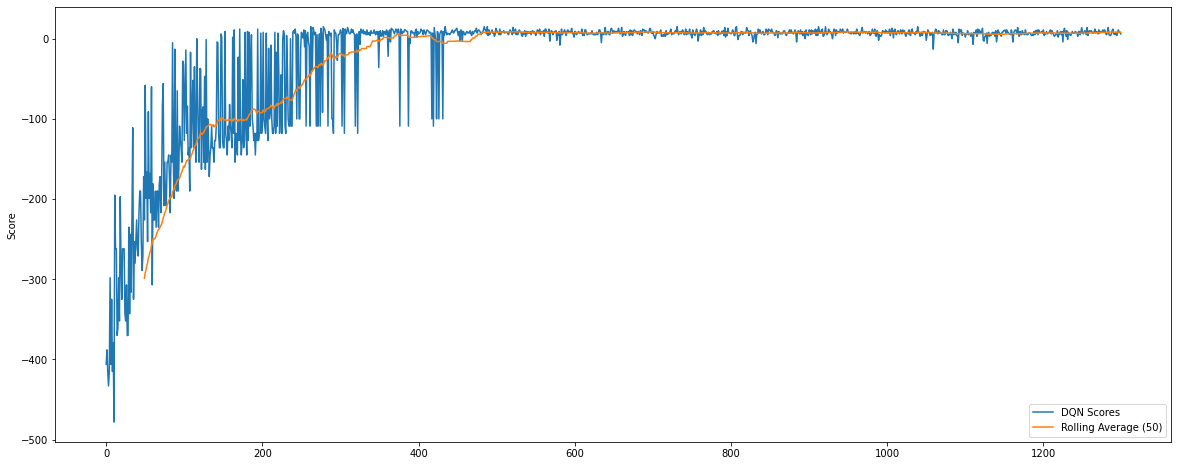

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(20, 8), sharex=True, sharey=True)
df_dqn.plot(ax=axes, label="DQN Scores")
df_dqn.rolling(window=50).mean().rename("Rolling Average (50)").plot(ax=axes)
axes.legend()
_ = axes.set_ylabel("Score")

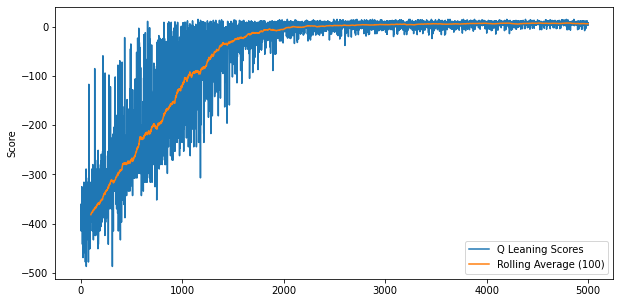

In [84]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)
df_qn.plot(ax=axes, label="Q Leaning Scores")
df_qn.rolling(window=100).mean().rename("Rolling Average (100)").plot(ax=axes)
axes.legend()
_ = axes.set_ylabel("Score")

## Plotting kernel density

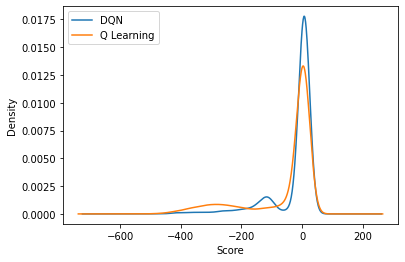

In [9]:
fig, ax = plt.subplots(1,1)
df_dqn.plot(kind="density", ax=ax, label="DQN")
df_qn.plot(kind="density", ax=ax, label="Q Learning")
ax.set_xlabel("Score")
_ = ax.legend()

### Evaluate both AI

In [10]:
def evalAgent(env, agent, n_game=100):
    total_steps, total_rewards, total_penalties = 0, 0, 0
    s, r, p = [], [], []
    for i in range(n_game):
        percent = round(((i + 1) / n_game) * 100)
        print("Loading {0}%".format(percent), end='\r')
        state = env.reset()
        penalties, rewards = 0, 0
        done = False
        step = 0
        while done == False:
            step += 1
            action = agent.get_action(state)
            state, reward, done, _ = env.step(action)
            rewards += reward
            if reward == -10:
                penalties += 1
            if done == True:
                break
        s.append(step)
        r.append(rewards)
        p.append(penalties)
        total_penalties += penalties
        total_rewards += rewards
        total_steps += step
    print(f"Results after {n_game} episodes:")
    print(f"Average timesteps per episode: {total_steps / n_game}")
    print(f"Average penalties per episode: {total_penalties / n_game}")
    print(f"Average rewards per episode: {total_rewards / n_game}")
    return s, r, p

In [85]:
ql_s, ql_r, ql_p = evalAgent(env, qagent, 10000)

Results after 10000 episodes:
Average timesteps per episode: 13.3288
Average penalties per episode: 0.069
Average rewards per episode: 7.0502


In [87]:
ql_data = {'score': ql_r, 'steps': ql_s, 'penalities': ql_p}
df_ql = pd.DataFrame(ql_data)
df_ql.index.name = "episode"

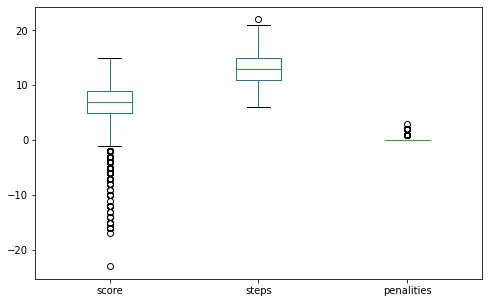

In [88]:
_ = df_ql.plot(figsize=(8,5), kind="box")

In [89]:
df_ql.describe().loc[['mean','max', 'min']]

,score,steps,penalities
mean,7.0502,13.3288,0.069
max,15.0000,22.0000,3.000
min,-23.0000,6.0000,0.000


In [27]:
dqn_s, dqn_r, dqn_p = evalAgent(env, dqn_agent, 1000)

Results after 1000 episodes:
Average timesteps per episode: 12.975
Average penalties per episode: 0.0
Average rewards per episode: 8.025


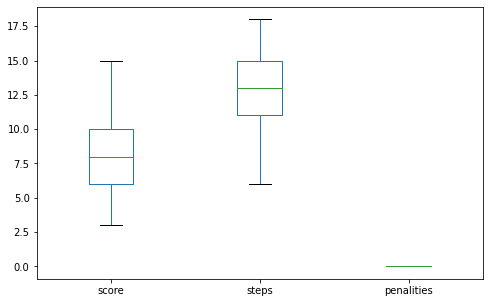

In [79]:
dqn_data = {'score': dqn_r, 'steps': dqn_s, 'penalities': dqn_p}
df_dqn = pd.DataFrame(dqn_data)
df_dqn.index.name = "episode"
_ = df_dqn.plot(figsize=(8,5), kind="box")

In [56]:
df_dqn.describe().loc[['mean','max', 'min']]

,score,steps,penalities
mean,8.025,12.975,0.0
max,15.000,18.000,0.0
min,3.000,6.000,0.0


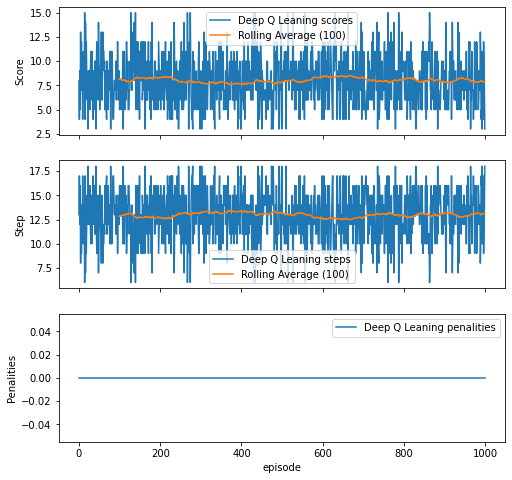

In [99]:
fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True, sharey=False)
df_dqn["score"].plot(ax=axes[0], label="Deep Q Leaning scores")
df_dqn["score"].rolling(window=100).mean().rename("Rolling Average (100)").plot(ax=axes[0])
axes[0].legend()
_ = axes[0].set_ylabel("Score")
df_dqn["steps"].plot(ax=axes[1], label="Deep Q Leaning steps")
df_dqn["steps"].rolling(window=100).mean().rename("Rolling Average (100)").plot(ax=axes[1])
axes[1].legend()
_ = axes[1].set_ylabel("Step")
df_dqn["penalities"].plot(ax=axes[2], label="Deep Q Leaning penalities")
#df_dqn["penalities"].rolling(window=50).mean().rename("Rolling Average (50)").plot(ax=axes[2])
axes[2].legend()
_ = axes[2].set_ylabel("Penalities")


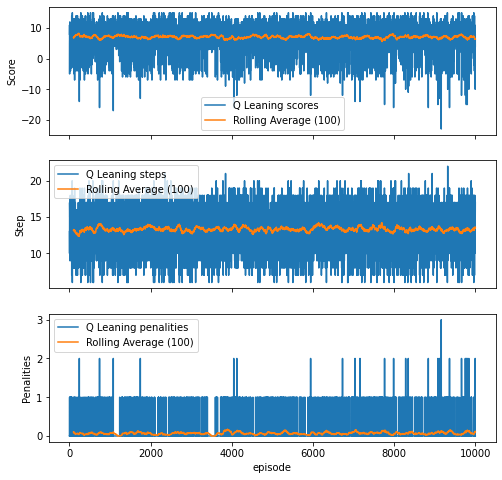

In [92]:
fig, axes = plt.subplots(3, 1, figsize=(8, 8), sharex=True, sharey=False)
df_ql["score"].plot(ax=axes[0], label="Q Leaning scores")
df_ql["score"].rolling(window=100).mean().rename("Rolling Average (100)").plot(ax=axes[0])
axes[0].legend()
_ = axes[0].set_ylabel("Score")
df_ql["steps"].plot(ax=axes[1], label="Q Leaning steps")
df_ql["steps"].rolling(window=100).mean().rename("Rolling Average (100)").plot(ax=axes[1])
axes[1].legend()
_ = axes[1].set_ylabel("Step")
df_ql["penalities"].plot(ax=axes[2], label="Q Leaning penalities")
df_ql["penalities"].rolling(window=100).mean().rename("Rolling Average (100)").plot(ax=axes[2])
axes[2].legend()
_ = axes[2].set_ylabel("Penalities")
